## 28. Нелинейный метод наименьших квадратов

[More J. J., Garbow B. S., Hillstrom K. E. Testing unconstrained optimization software // ACM TOMS. 1981. 7 (1). 17--41]

Нелинейным методом наименьших квадратов
построить модели вида
$$
y = \beta_1 e^{-\beta_2 x}
\qquad
\mbox{и}
\qquad
y = \beta_1 e^{\frac{\beta_2}{x+\beta_3}}
$$
для данных, приведенных в таблице
```
  x         y    
----------------                
 50       34780    
 55       28610    
 60       23650    
 65       19630    
 70       16370    
 75       13720    
 80       11540    
 85        9744    
 90        8261    
 95        7030    
100        6005    
105        5147    
110        4427    
115        3820    
120        3307    
125        2872    
```
Для первой функции также найдите аппроксимацию, сведя задачу к линейному методу наименьших квадратов. Найти общую ошибку в каждом из случаев и сравнить результаты.

# Решение:
### Модключим необходимые библиотеки:

In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Выпишим исходные данные:

In [91]:
x = np.arange(50,126,5)
y = np.array([34780,28610,23650,19630,16370,13720,11540,9744,8261,7030,6005,5147,4427,3820,3307,2872])
def f1(x,b1,b2):
    return b1 * np.exp(-b2*x)
def f2(x,b1,b2,b3):
    return b1 * np.exp(b2 / (x + b3))

### Расмотрим модель первого уравнения:

Исходное уравнение: $$
y = \beta_1 e^{-\beta_2 x}
$$

Прологарифмируем исходное уравнение: $$
ln(y) = ln(\beta_1) - \beta_2 x
$$

Обозначим:$$
 y_0 = ln(y),\qquad t = ln(\beta_1),\qquad a = -(\beta_2)
$$

Получим уравнение:
$$
y_0 = t - a x
$$

Теперь неизвестные параметры входят линейно. Найдем неизвестные методом наименьших квадратов с помощью функции polyfit:

In [92]:
a, t = np.polyfit(x,np.log(y),1)
beta1 = np.exp(t)
beta2 = -a
print("b1 = ", beta1 ,"\nb2 = ", beta2)

b1 =  170284.11836824025 
b2 =  0.03317695343595521


Получив значения $\beta_1$ и $\beta_2$ построим график:

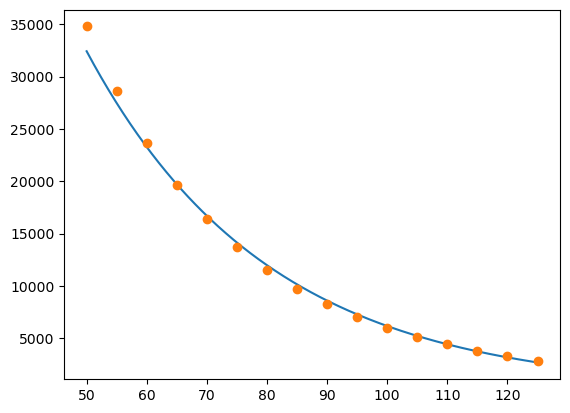

In [93]:
xx = np.linspace(50,125, 500)
yy = f1(xx,beta1,beta2)

plt.plot(xx,yy,'-')
plt.plot(x,y,'o')
pass

Другой способ подобрать значения параметров использовать нелинейный метод наименьших квадратов.
Нелинейный метод найименьших квадратов реализован в функции curve_fit модуля numpy.optimize. Благодаря этому методу мы можем получить более точные значения параметров. Подключим метод cuve_fit и найдем параметры:

In [94]:
from scipy.optimize import curve_fit
res,_ = curve_fit(f1, x, y,[beta1,beta2])
b1,b2 = res
print("b1 = ", b1 ,"\nb2 = ", b2)

b1 =  202040.45139790926 
b2 =  0.03554511806680699


Получив значения $\beta_1$ и $\beta_2$ построим график:

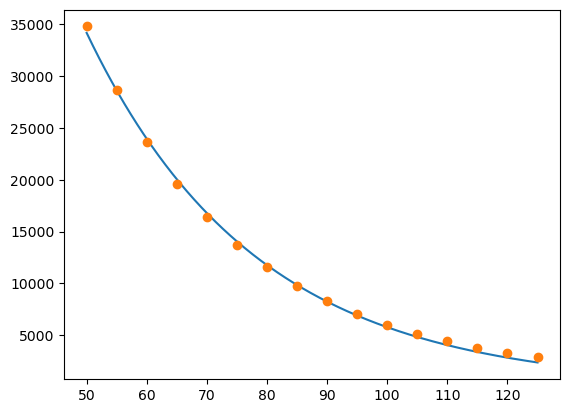

In [95]:
xx = np.linspace(50,125, 500)
yy = f1(xx,b1,b2)

plt.plot(xx,yy,'-')
plt.plot(x,y,'o')
pass

Вычеслим ошбку для первого и второго метода:
$$
\frac{\displaystyle\sum_{i=1}^{n} (f1(x_i) - y_i) ^ 2} {n}
$$

In [96]:
eror1 = 0
eror2 = 0
for i in range(len(x)):
    eror1 += (y[i] - f1(x[i],beta1,beta2))**2
    eror2 += (y[i] - f1(x[i],b1,b2)) ** 2
eror1 /= len(x)
eror2 /= len(x)
print("eror1 = ", eror1 ,"\neror2 = ", eror2)

eror1 =  498737.0402216384 
eror2 =  120954.06416047996


Наложим графики друг на друга:

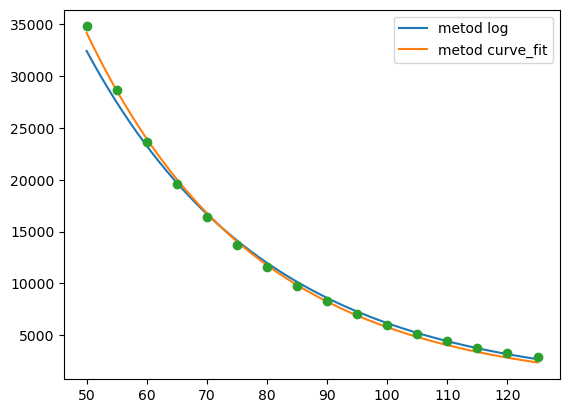

In [97]:
xx = np.linspace(50,125, 500)
yy = f1(xx,beta1,beta2)

plt.plot(xx,yy,'-',label="metod log")
plt.plot(xx,f1(xx,b1,b2),'-',label="metod curve_fit")
plt.plot(x,y,'o')
plt.legend()
pass

Можем заметить, что ошибка метода curve_fit меньше в несколько раз, а значит данный метод дает более точные значения, но не смотря на ошибку больших различий в графиках не заметно.

### Расмотрим модель второго уравнения:
Исходное уравнение: $$
y = \beta_1 e^{\frac{\beta_2}{x+\beta_3}}
$$

Восполььзуемся методом curve_fit модуля numpy.optimize. Для этого нужно подобрать приближенные коэфиценты $\beta_1$ $\beta_2$ и $\beta_3$ или увиличить количество итераций, воспользуемся увиличением итераций.

In [109]:
res,_ = curve_fit(f2, x, y,maxfev = 20000)
b1,b2,b3 = res
print("b1 = ", b1 ,"\nb2 = ", b2,"\nb3 = ", b3)

b1 =  0.005609637584984894 
b2 =  6181.346180778568 
b3 =  345.22362905420846


Получив значения $\beta_1$, $\beta_2$ и $\beta_3$ построим график:

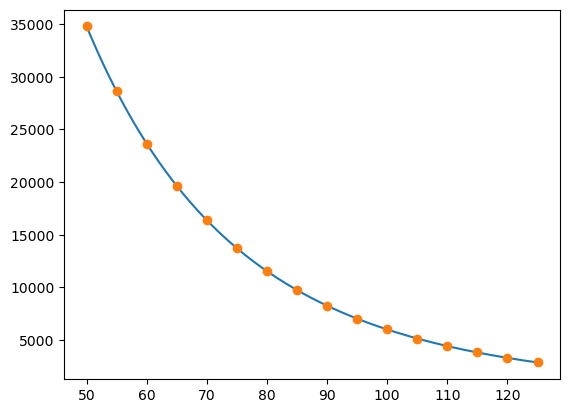

In [110]:
xx = np.linspace(50,125, 500)
yy = f2(xx,b1,b2,b3)

plt.plot(xx,yy,'-')
plt.plot(x,y,'o')
pass

Вычеслим ошбку:
$$
\frac{\displaystyle\sum_{i=1}^{n} (f2(x_i) - y_i) ^ 2} {n}
$$

In [112]:
eror3 = 0
for i in range(len(x)):
    eror3 += (y[i] - f2(x[i],b1,b2,b3)) ** 2
eror3 /= len(x)
print("eror3 = ", eror3)

eror3 =  5.496615948194956


# Вывод:


Можем заметить, что второе уравнение дает ошибку меньше в несколько раз чем первоев (в 24190 раз), а значит данный метод дает более точные значения,сравним графики этих функций:

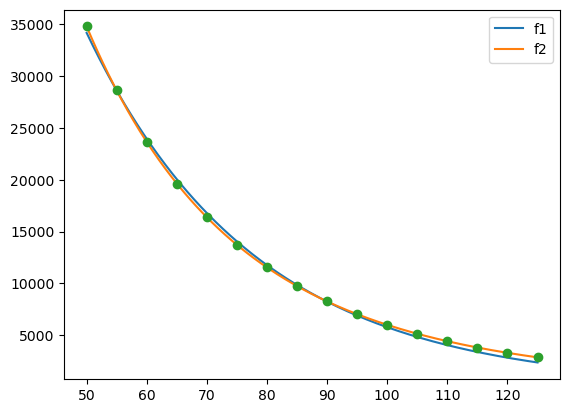

In [116]:
xx = np.linspace(50,125, 500)
res,_ = curve_fit(f1, x, y,[beta1,beta2])
beta1,beta2 = res
plt.plot(xx,f1(xx,beta1,beta2),'-',label="f1")

yy = f2(xx,b1,b2,b3)
plt.plot(xx,yy,'-',label="f2")

plt.plot(x,y,'o')
plt.legend()
pass

Различие между графиками, не смотря на погрешность, очень небольшая, по этому можно использовать оба этих уравнения для апроксимацим данных